In [2]:
# 0~3 right leg (up to down)
# 4~6 left leg (up to down)
# 7~10 body and head (down to up)
# 11~13 left hand (up to down)
# 14~16 right hand (up to down)

In [1]:
import os
import shutil
import matplotlib
# matplotlib.use('Qt4Agg')
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
_CONNECTION = [
    [0, 1], [1, 2], [2, 3], [0, 4], [4, 5], [5, 6], [0, 7], [7, 8],
    [8, 9], [9, 10], [8, 11], [11, 12], [12, 13], [8, 14], [14, 15],
    [15, 16]]
_ACTION_PROPOSALS = [[0 + 1, 321], [342 + 1, 651], [673 + 1, 982], [1003 + 1, 1313], [1335 + 1, 1643], [1664 + 1, 1973], [1995 + 1, 2304], [2327 + 1, 2639]]
_INDEX_RANGE = range(1, 2638 + 1)
_COLOR = [(0, 0, 0), (255, 0, 0), (0, 255, 0), (0, 0, 255), 
          (0, 255, 255), (255, 0, 255), (0, 255, 255), (255, 255, 255)]

In [ ]:
# 得到中间“空缺”的图片的索引
blank = []
for i in range (1, 2638 + 1):
    if os.path.isfile('3DIMG/{}.png'.format(i)) == False:
        blank.append(i)
print(blank)

In [16]:
# 得到坐标数据，对应的3D图片
for i in _INDEX_RANGE:
    _points = []
    try:
        with open('3dpose/{0}.txt'.format(i)) as f:
            _points = f.read().split('\n')[:-1]
    except:
        i += 1
        continue
    xs = [float(point.split(' ')[0]) for point in _points]
    ys = [float(point.split(' ')[1]) for point in _points]
    zs = [float(point.split(' ')[2]) for point in _points]

    fig = plt.figure()
    ax = fig.gca(projection = '3d')
    for c in _CONNECTION:
        print([xs[c[0]], xs[c[1]]], [ys[c[0]], ys[c[1]]], [zs[c[0]], zs[c[1]]])
        ax.plot([xs[c[0]], xs[c[1]]], [ys[c[0]], ys[c[1]]], [zs[c[0]], zs[c[1]]])
    ax.scatter(xs, ys, zs)

    smallest, largest = -600, 600
    ax.set_xlim3d(smallest, largest)
    ax.set_ylim3d(smallest, largest)
    ax.set_zlim3d(smallest, largest)
    plt.savefig('3DIMG/{0}.png'.format(i))
    plt.show()

[-74.0955797549, -173.366848638] [41.656408845, -81.2233930381] [-150.188751853, -154.15350354]
[-173.366848638, -91.0151256676] [-81.2233930381, -147.805207158] [-154.15350354, -596.207061733]
[-91.0151256676, -254.227479606] [-147.805207158, -41.1008025595] [-596.207061733, -1044.96109065]
[-74.0955797549, 8.20193858535] [41.656408845, 164.536352516] [-150.188751853, -153.190186336]
[8.20193858535, 120.516191473] [164.536352516, 79.0398835126] [-153.190186336, -518.316905282]
[120.516191473, 75.905142508] [79.0398835126, 132.891664765] [-518.316905282, -914.990273653]
[-74.0955797549, -79.9540525816] [41.656408845, 45.894712077] [-150.188751853, 137.896899776]
[-79.9540525816, -61.7478672463] [45.894712077, 22.8887199007] [137.896899776, 412.996252603]
[-61.7478672463, 48.5739444377] [22.8887199007, -33.8148029353] [412.996252603, 512.157545086]
[48.5739444377, 67.8088353352] [-33.8148029353, -4.47861673936] [512.157545086, 700.204409164]
[-61.7478672463, 72.7167998905] [22.888719900

In [ ]:
# 通过画scatter的方法，找到坐标和图中实际的坐标之间的对应关系
with open('3dpose/3.txt') as f:
    # The last line is empty, need to clean it
    points = f.read().split('\n')[:-1]

xs = [float(point.split(' ')[0]) for point in points]
ys = [float(point.split(' ')[1]) for point in points]
zs = [float(point.split(' ')[2]) for point in points]

for i in range(0, 16 + 1):

    fig = plt.figure()
    ax = fig.gca(projection='3d')

    for c in _CONNECTION:
        ax.plot([xs[c[0]], xs[c[1]]], [ys[c[0]], ys[c[1]]], [zs[c[0]], zs[c[1]]])
    ax.scatter(xs[0 : i] + xs[i + 1: 16 + 1],
               ys[0: i] + ys[i + 1: 16 + 1],
               zs[0: i] + zs[i + 1: 16 + 1])

    smallest, largest = -600, 600
    ax.set_xlim3d(smallest, largest)
    ax.set_ylim3d(smallest, largest)
    ax.set_zlim3d(smallest, largest)

    plt.savefig('FindPoint/{}.png'.format(i))

In [ ]:
# 重命名，为了方便的使用FFMPEG，得到视频
_FILE_LIST = os.listdir('{0}{1}'.format(os.curdir, '/video'))
k = sorted(_FILE_LIST, key=lambda x:int(x.split('.')[0]))
for index,name in enumerate(k):
    # print('index: {}, name:{}'.format(index, name))
    os.rename('./video/{}'.format(name), './video/{}{}'.format(index, '.png'))

In [18]:
print(os.listdir(os.curdir))

['.ipynb_checkpoints', '3DIMG', '3dpose', '3dpose.ipynb', '3dpose.py', 'draw.py', 'FindPoint', 'img', 'img.zip', 'video']


In [20]:
# 画出8， 11 ，14 ，15 ，16，共计5个点的的散点图
for _i in _ACTION_PROPOSALS:
    _i = _ACTION_PROPOSALS[0]
    fig = plt.figure()
    ax = fig.add_subplot(3,3,_i, projection = '3d')

    for i in range(_i[0], _i[1]):
        points = []
        with open('./3dpose/{}.txt'.format(i)) as f:
            points = f.read().split('\n')[:-1]
        xs = [float(point.split(' ')[0]) for point in points]
        ys = [float(point.split(' ')[1]) for point in points]
        zs = [float(point.split(' ')[2]) for point in points]

        ax.scatter(xs[15], ys[15], zs[15], c='red')
        ax.scatter(xs[16], ys[16], zs[16], c='blue')
        ax.scatter(xs[14], ys[14], zs[14], c='yellow')

        ax.plot_surface

        smallest, largest = -600, 600
        ax.set_xlim3d(smallest, largest)
        ax.set_ylim3d(smallest, largest)
        ax.set_zlim3d(smallest, largest)
        ax.set_xlabel('X axis')
        ax.set_ylabel('Y axis')
        ax.set_zlabel('Z axis')
    plt.show()

TypeError: '<' not supported between instances of 'list' and 'int'

In [14]:

for i in range(8, 9):
    fig = plt.figure()
    ax = fig.add_subplot('111',projection = '3d')    
    for _ACTION in _ACTION_PROPOSALS:
        for j in range(_ACTION[0], _ACTION[1]):
            points = []
            with open('./3dpose/{}.txt'.format(j)) as f:
                points = f.read().split('\n')[:-1]
            xs = [float(point.split(' ')[0]) for point in points]
            ys = [float(point.split(' ')[1]) for point in points]
            zs = [float(point.split(' ')[2]) for point in points]            
            ax.scatter(xs[i], ys[i], zs[i], c = 'black')
        
    smallest, largest = -600, 600
    ax.set_xlim3d(smallest, largest)
    ax.set_ylim3d(smallest, largest)
    ax.set_zlim3d(smallest, largest)
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    print('{}.png finished'.format(i))    
    plt.show()
#     plt.savefig('./find_stable_points/{}.png'.format(i))
    

8.png finished


In [38]:
# 定义一个余弦公式，来计算角度
def _consine_formula(x ,y, z):
    '''
    input : x, y, z三个三维的坐标,y是待计算的角度
    return ： 角度
    '''
    xy2 = math.pow(x[0] - y[0], 2) + math.pow(x[1] - y[1], 2) + math.pow(x[2] - y[2], 2)
    xz2 = math.pow(x[0] - z[0], 2) + math.pow(x[1] - z[1], 2) + math.pow(x[2] - z[2], 2)
    yz2 = math.pow(y[0] - z[0], 2) + math.pow(y[1] - z[1], 2) + math.pow(y[2] - z[2], 2)
    
    return math.acos((xy2 + yz2 - xz2)/(2 * math.sqrt(xy2 * yz2))) * (180/math.pi)
print(_consine_formula([1, 0, 0], [0, 0, 0], [0, 1, 0]))
print(_consine_formula([1, 0, 0], [0, 0, 0], [-1, 0, 0]))
print(_consine_formula([1, 0, 0], [0, 0, 0], [1, 0, 1])) # 45
print(_consine_formula([1, 0, 0], [0, 0, 0], [1, 0, -1])) #315
print(_consine_formula([1, 0, 0], [0, 0, 0], [-1, 0, 1])) #135


90.0
180.0
45.00000000000001
45.00000000000001
135.0


In [66]:
# 得到每一帧动作对应的角度vector
def frame2vecror(index):
    '''
    input:
        index of filename
    return : 
        [angle1, angle2, angle3]
        angle1 = 14, 15, 16
        angle2 = 15, 14, 8
        angle3 = 10, 8 ,16
    
    '''
    _points = []
    with open('./3dpose/{}.txt'.format(index)) as f:
        _points = f.read().split('\n')[:-1]
        for index, value in enumerate(_points):
            _points[index] = [float(xyz_value) for xyz_value in value.split(' ')]
#     return [_consine_formula(_points[14], _points[15], _points[16]), 
#             _consine_formula(_points[15], _points[14], _points[8]), 
#             _consine_formula(_points[10], _points[8], _points[16])]
    return _points
frame2vecror(3)

[[41.7416305667, 109.009757233, -69.1003950057],
 [-112.561931803, 128.22255071, -41.8203777133],
 [-204.122865125, -82.4318314776, -400.557333599],
 [-274.371155969, -1.93991805281, -795.736172236],
 [179.252519102, 89.7969593122, -37.0684138542],
 [318.954341685, -114.88293622, -398.342219707],
 [416.222537868, 25.6375709012, -787.944363526],
 [24.9728641081, 100.423635457, 177.696325434],
 [-27.0994536967, 24.454972783, 392.337475549],
 [-57.1751591861, -79.8568724385, 479.920927023],
 [-89.6135888296, -50.7441307046, 683.337623333],
 [156.05927625, 4.34964357463, 427.889785349],
 [342.015199268, -86.6883566463, 237.145319592],
 [189.192762671, -219.525313527, 162.802498967],
 [-201.859331195, 75.3009402116, 354.016062347],
 [-306.984660194, 123.571399576, 76.4313600917],
 [-385.083650035, -45.5916744109, -103.282169083]]

In [64]:
plt.close()
fig = plt.figure()
ax = fig.add_subplot('111', projection='3d')
# ax = fig.add_subplot('111')
for i, ACTION in enumerate(_ACTION_PROPOSALS[:4]):
    for file_index in range(ACTION[0], ACTION[1]):
#         angles = frame2vecror(file_index)
#         ax.scatter(angles[0], angles[1], c = '#%02x%02x%02x' % _COLOR[i])
        print(file_index)
        points = frame2vecror(file_index)
        print(points)
#         print(points[15][0] - points[9][0], points[15][1] - points[9][1], points[15][2] - points[9][2])
#         ax.scatter(points[15][0] - points[9][0], points[15][1] - points[9][1], points[15][2] - points[9][2],  c = '#%02x%02x%02x' % _COLOR[i])
#         ax.scatter(points[16][0] - points[9][0], points[16][1] - points[9][1], points[16][2] - points[9][2],  c = '#%02x%02x%02x' % _COLOR[i])
# plt.show()

1
[102.17055706912556, 123.43873728567551, 127.92630892055217]
2
[118.1067970084181, 139.0400969043867, 130.6590110334575]
3
[129.89518998508592, 124.22986535840099, 128.10372699619407]
4
[124.70551154490778, 127.11095268087486, 114.94402942268529]
5
[119.66975294246947, 130.50722270912837, 121.09776660865916]
6
[113.3319063517525, 130.9952674901113, 117.01525807726193]
7
[105.13650485167989, 121.98095948452374, 110.32818171247301]
8
[112.76664360110956, 129.17377005868735, 104.05499032579823]
9
[112.36372164516794, 130.39887973574528, 95.14438431920765]
10
[116.09128698596294, 129.63167297061338, 110.16222555914759]
11
[115.9705129799103, 129.18255465993298, 113.64296034553632]
12
[109.92834890202445, 142.2986619631335, 109.58728807547939]
13
[84.5189097699537, 161.29741089853061, 117.58478865588576]
14
[66.86202179240625, 128.53282853650018, 88.7293311599077]
15
[69.35591893597845, 75.17817869897509, 131.51773975780256]
16
[70.72651619202712, 144.70980081741925, 86.57435294278989]
17

In [1]:
# 0~3 right leg (up to down)
# 4~6 left leg (up to down)
# 7~10 body and head (down to up)
# 11~13 left hand (up to down)
# 14~16 right hand (up to down)

import os
import shutil
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
matplotlib.use('Qt4Agg')

from mpl_toolkits.mplot3d import Axes3D
from sklearn.naive_bayes import GaussianNB

_CONNECTION = [
    [0, 1], [1, 2], [2, 3], [0, 4], [4, 5], [5, 6], [0, 7], [7, 8],
    [8, 9], [9, 10], [8, 11], [11, 12], [12, 13], [8, 14], [14, 15],
    [15, 16]]
_ACTION_PROPOSALS = [[0 + 1, 321], [342 + 1, 411], [673 + 1, 982], [1003 + 1, 1313], [1335 + 1, 1643], [1664 + 1, 1973], [1995 + 1, 2304], [2327 + 1, 2639]]
_INDEX_RANGE = range(1, 2638 + 1)
_COLOR = [(0, 0, 0), (255, 0, 0), (0, 255, 0), (0, 0, 255),
          (0, 255, 255), (255, 0, 255), (0, 255, 255), (255, 255, 255)]

C:\Users\zhang\Anaconda3\lib\site-packages\matplotlib\__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [6]:
# 定义一个余弦公式，来计算角度
def _consine_formula(x, y, z):
    '''
    input : x, y, z三个三维的坐标,y是待计算的角度
    return ： 角度
    '''
    xy2 = math.pow(x[0] - y[0], 2) + math.pow(x[1] - y[1], 2) + math.pow(x[2] - y[2], 2)
    xz2 = math.pow(x[0] - z[0], 2) + math.pow(x[1] - z[1], 2) + math.pow(x[2] - z[2], 2)
    yz2 = math.pow(y[0] - z[0], 2) + math.pow(y[1] - z[1], 2) + math.pow(y[2] - z[2], 2)

    return math.acos((xy2 + yz2 - xz2) / (2 * math.sqrt(xy2 * yz2))) * (180 / math.pi)


# 得到每一帧动作对应的角度vector
def frame2vecror(index):
    '''
    input:
        index of filename
    return : 
        [angle1, angle2, angle3]
        angle1 = 14, 15, 16
        angle2 = 15, 14, 8
        angle3 = 10, 8 ,16

    '''
    _points = []
    with open('./3dpose/{}.txt'.format(index)) as f:
        _points = f.read().split('\n')[:-1]
        for index, value in enumerate(_points):
            _points[index] = [float(xyz_value) for xyz_value in value.split(' ')]
            #     return [_consine_formula(_points[14], _points[15], _points[16]),
            #             _consine_formula(_points[15], _points[14], _points[8]),
            #             _consine_formula(_points[10], _points[8], _points[16])]
    return _points
def get_XY():
    _POINTS = []
    _CLASS = []
    for i, ACTION in enumerate(_ACTION_PROPOSALS[:4]):
        for file_index in range(ACTION[0], ACTION[1]):
            points = frame2vecror(file_index)
            _POINTS.append(np.array(points[15]) - np.array(points[9]))
            _CLASS.append(i)
    return np.array(_POINTS), np.array(_CLASS)

def get_validXY():
    _POINTS = []
    _CLASS = []
    for i, ACTION in enumerate(_ACTION_PROPOSALS[4:]):
        for file_index in range(ACTION[0], ACTION[1]):
            points = frame2vecror(file_index)
            _POINTS.append(np.array(points[15]) - np.array(points[9]))

            if i == 4 - 4:
                _CLASS.append(1)
            elif i == 5 - 4:
                _CLASS.append(2)
            elif i == 6 - 4:
                _CLASS.append(0)
            else:
                _CLASS.append(3)
    return np.array(_POINTS), np.array(_CLASS)

In [7]:
X, Y = get_XY()
clf = GaussianNB().fit(X, Y)
valid_X, valid_Y = get_validXY()
result = clf.predict(valid_X)

v = valid_Y == result
print(len(v)/len(valid_Y))
# fig = plt.figure()

fig = plt.figure()
ax1 = fig.add_subplot('221')
ax2 = fig.add_subplot('222')
ax3 = fig.add_subplot('223')
ax4 = fig.add_subplot('224')
# v = [0, 0, 0, 0, 0, 1, 1, 1, 1 ]
ax1.plot(v[:310])
ax2.plot(v[310:309 + 310])
ax3.plot(v[309 + 310:309 + 310 + 310])
ax4.plot(v[309 + 310 + 310:])
plt.show()

NameError: name 'GaussianNB' is not defined

1.0


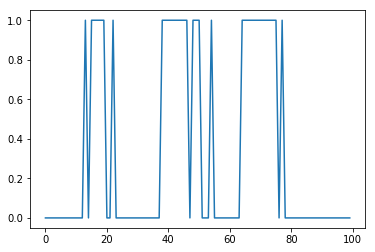

In [13]:
X, Y = get_XY()
clf = GaussianNB().fit(X, Y)
valid_X, valid_Y = get_validXY()
result = clf.predict(valid_X)

v = valid_Y == result
print(len(v)/len(valid_Y))
# fig = plt.figure()

fig = plt.figure()
ax = fig.gca()
# v = [0, 0, 0, 0, 0, 1, 1, 1, 1 ]
ax.plot(v[100:200])
plt.show()

1.0


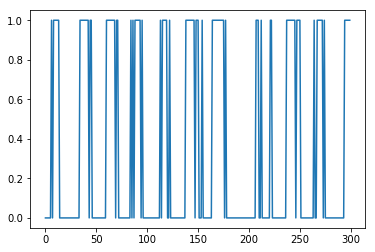

In [20]:
X, Y = get_XY()
clf = GaussianNB().fit(X, Y)
valid_X, valid_Y = get_validXY()
result = clf.predict(valid_X)

v = valid_Y == result
print(len(v)/len(valid_Y))
# fig = plt.figure()

fig = plt.figure()
ax = fig.gca()
# v = [0, 0, 0, 0, 0, 1, 1, 1, 1 ]
ax.plot(v[:300])
plt.show()

1.0


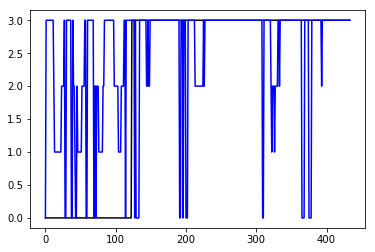

In [22]:
X, Y = get_XY()
clf = GaussianNB().fit(X, Y)
valid_X, valid_Y = get_validXY()
result = clf.predict(valid_X)

v = valid_Y == result
print(len(v)/len(valid_Y))
# fig = plt.figure()

fig = plt.figure()
ax = fig.gca()
# v = [0, 0, 0, 0, 0, 1, 1, 1, 1 ]
ax.plot(valid_Y[800:], c = 'black')
ax.plot(result[800:], c = 'blue')
plt.show()  

In [4]:
import os

for i in _ACTION_PROPOSALS:
    for index in range(i[0], i[1]):
        print(index)
        if not os.path.exists('./3dpose//{}.txt'.format(index)):
            print('{}.txt not exist!'.format(index))
        

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
